In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install scikit-learn



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

In [5]:


file_path = r"C:\Users\NIS\Desktop\2CS\S2\ML\tps\projet_Ml\Bengaluru_House_Data.csv"

try:
    # Attempt to read the CSV file
    data = pd.read_csv(file_path, encoding='utf-8')
    print("File successfully loaded.")
except FileNotFoundError:
    # Handle the case where the file is not found
    print("Error: File not found at", file_path)
except Exception as e:
    # Handle other exceptions
    print("Error:", e)


File successfully loaded.


# 1- Explore Data 

In [6]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
data.shape

(13320, 9)

In [8]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
data.duplicated().sum()


529

In [11]:
data.shape

(13320, 9)

In [12]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# 2- Analysis

In [13]:
for col in data.columns:
  print(col,":",data[col].nunique())

area_type : 4
availability : 81
location : 1305
size : 31
society : 2688
total_sqft : 2117
bath : 19
balcony : 4
price : 1994


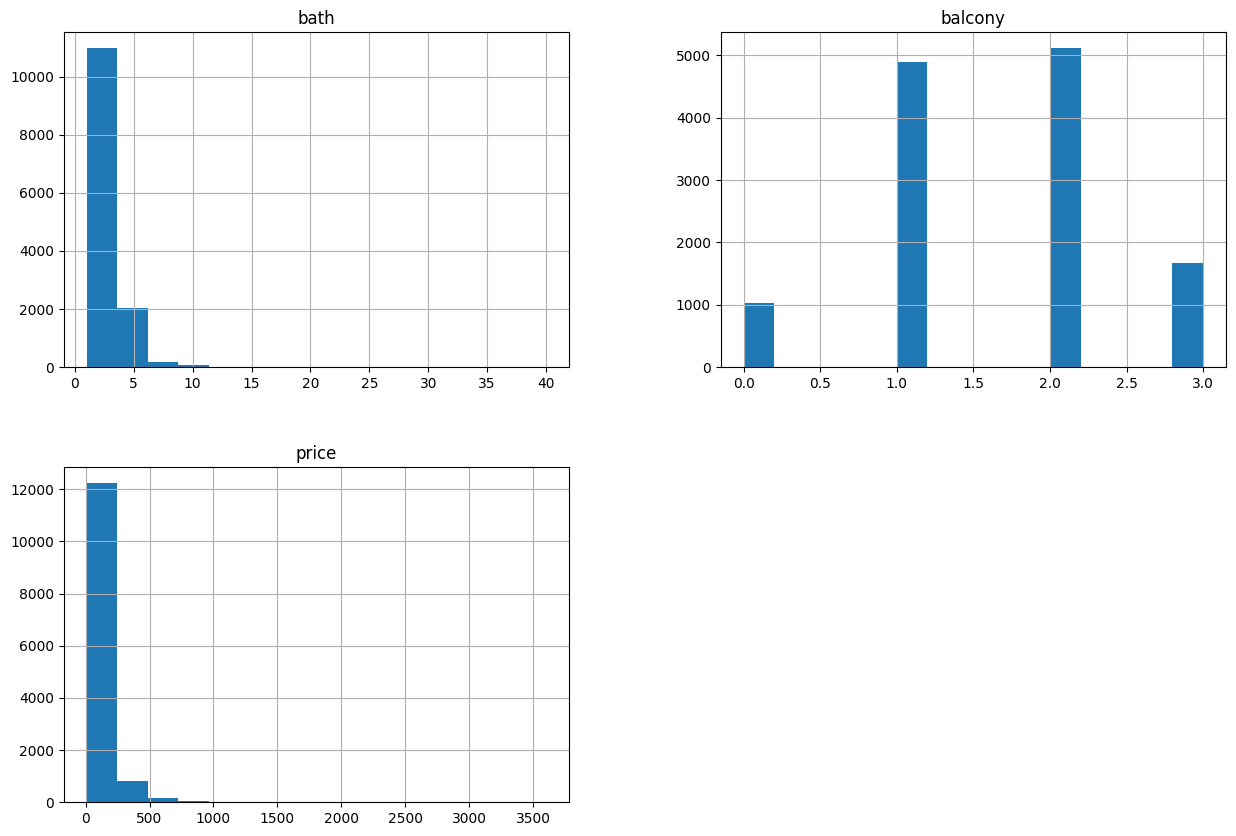

In [14]:
data.hist(bins=15, figsize=(15, 10))
plt.show()


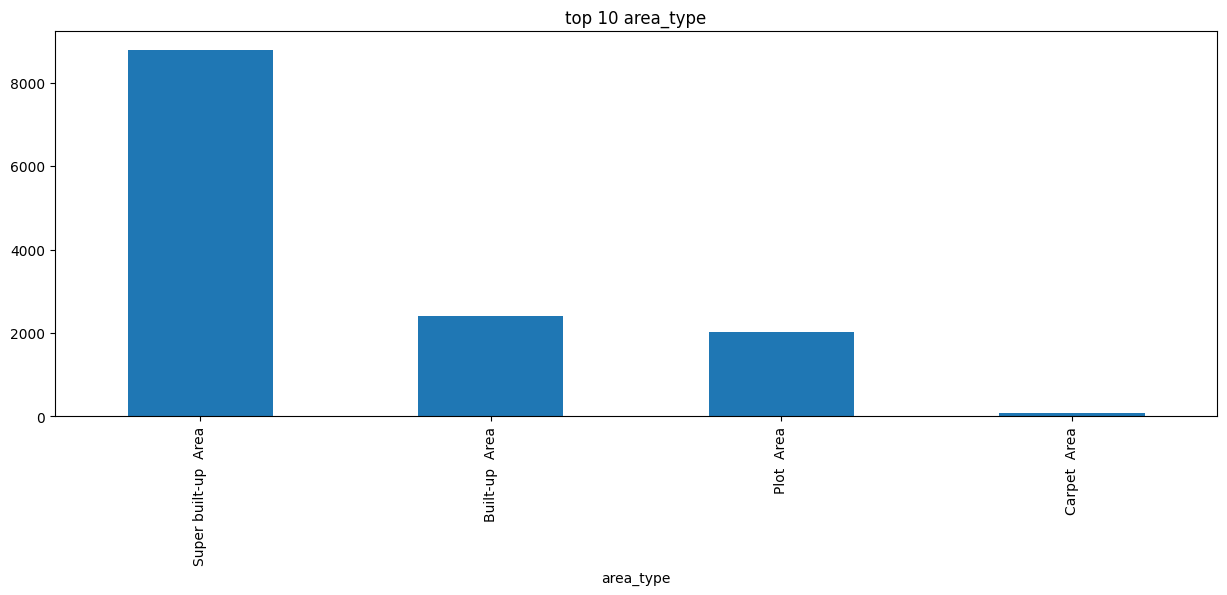

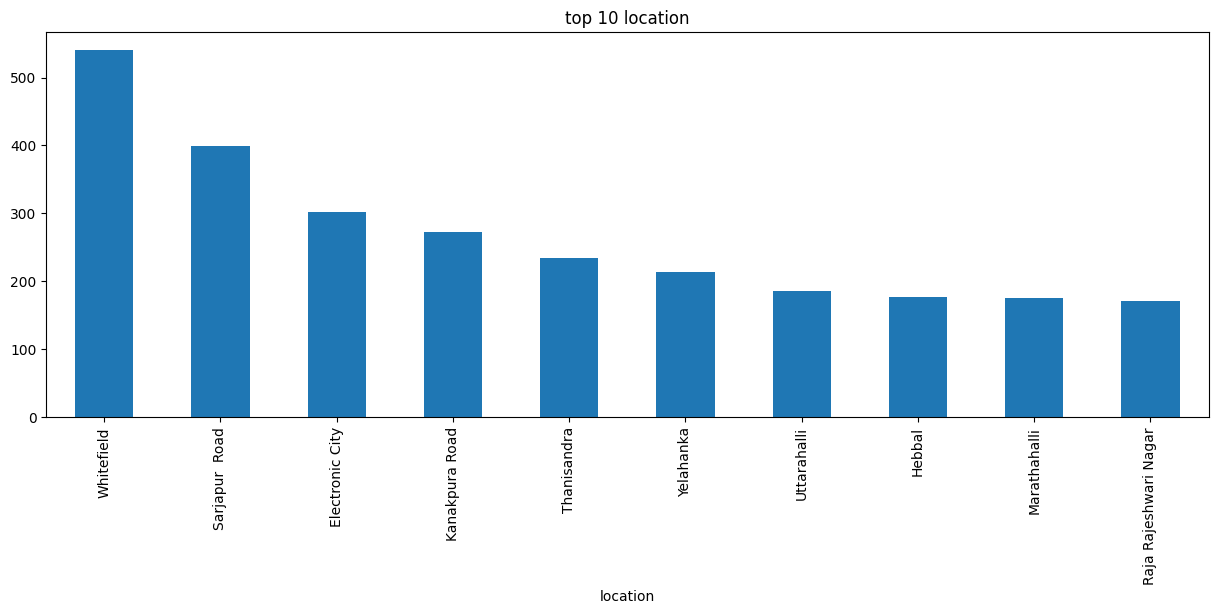

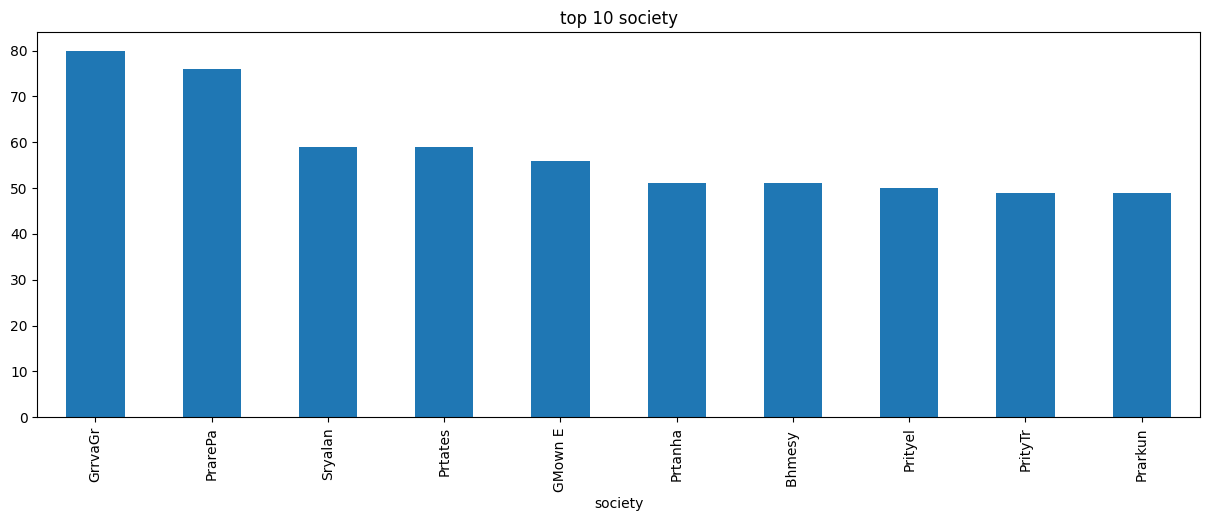

In [15]:
data_objects=['area_type','location','society']
for object in data_objects:
   plt.figure(figsize=(15,5))
   top10=data[object].value_counts()[:10]
   top10.plot(kind='bar')
   plt.title("top 10"+" "+object)
   plt.show()

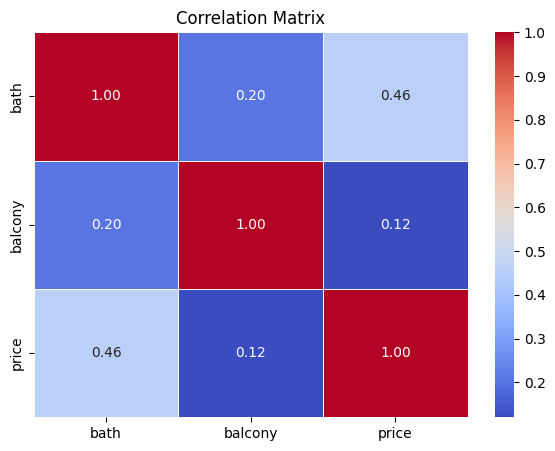

In [16]:
numeric_df = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# 3- Data Processing

#### Drop duplicate values in the data

In [17]:

data.drop_duplicates(inplace=True)

In [18]:
data.shape

(12791, 9)



#### Drop the 'society' column

In [19]:
data=data.drop(['society'],axis=1)

#### Handle missing values

In [20]:
data.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [21]:
data['size'] = data['size'].fillna('2 BHK')
data['bath'] = data['bath'].fillna(data['bath'].median())
data['balcony'] = data['balcony'].fillna(data['balcony'].median())

In [22]:
mode_location = data['location'].mode()[0]
data['location'].fillna(mode_location, inplace=True)

In [23]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


# 4- Detect Outliers 

In [24]:
data['bath'].describe() 

count    12791.000000
mean         2.704558
std          1.354936
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [25]:
data['balcony'].describe() 


count    12791.000000
mean         1.602064
std          0.807728
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

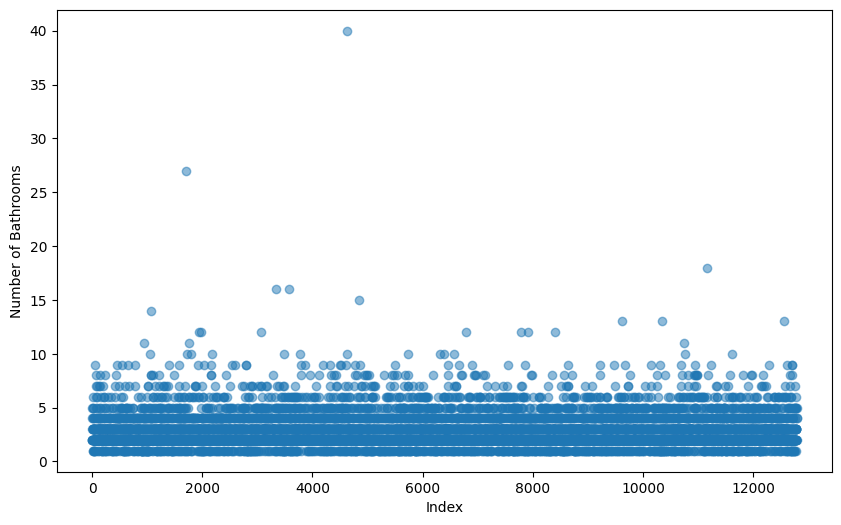

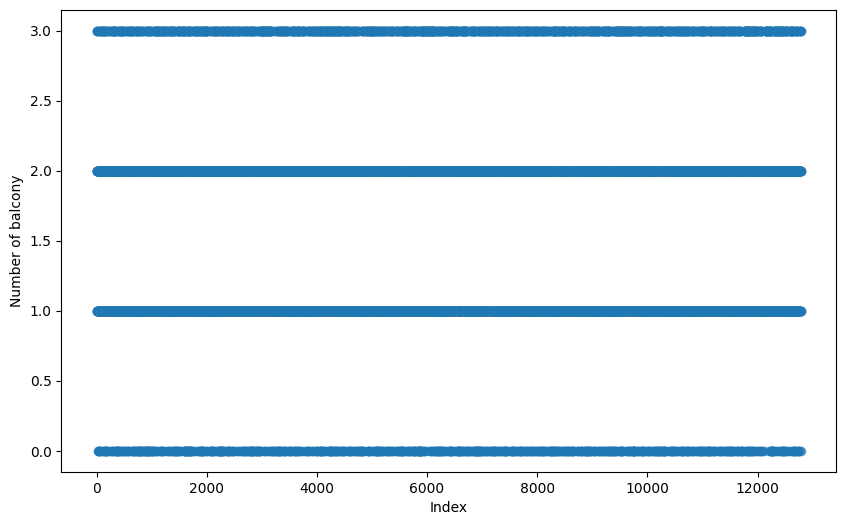

In [26]:


plt.figure(figsize=(10, 6))
plt.scatter(range(len(data['bath'])), data['bath'], alpha=0.5)
plt.xlabel('Index')  # Ajout d'un libellé pour l'axe des abscisses (x-axis)
plt.ylabel('Number of Bathrooms')  # Ajout d'un libellé pour l'axe des ordonnées (y-axis)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(data['balcony'])), data['balcony'], alpha=0.5)
plt.xlabel('Index')  # Ajout d'un libellé pour l'axe des abscisses (x-axis)
plt.ylabel('Number of balcony')  # Ajout d'un libellé pour l'axe des ordonnées (y-axis)
plt.show()


In [27]:
data_numeric = data.select_dtypes(exclude='object')
for col in data_numeric:
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    outliers=((data_numeric[col]>high)|(data_numeric[col]<low)).sum()
    if outliers> 0:
        data=data.loc[(data[col]>=low) & (data[col]<=high)]

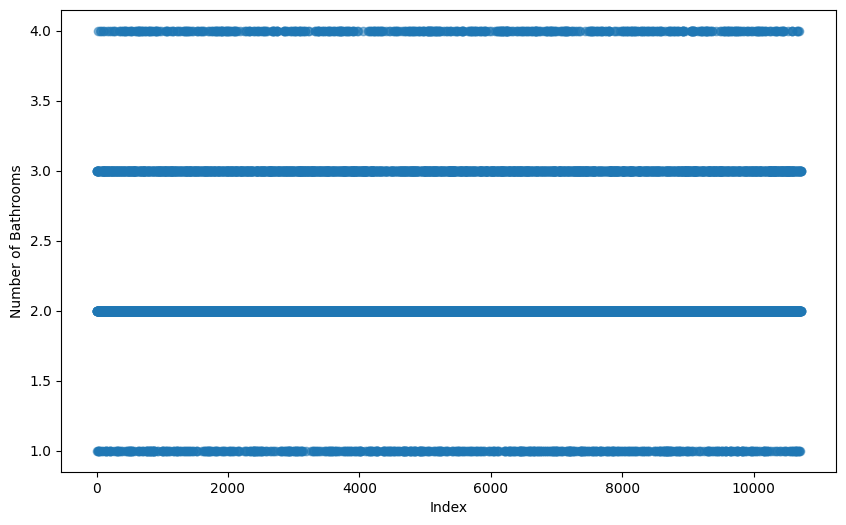

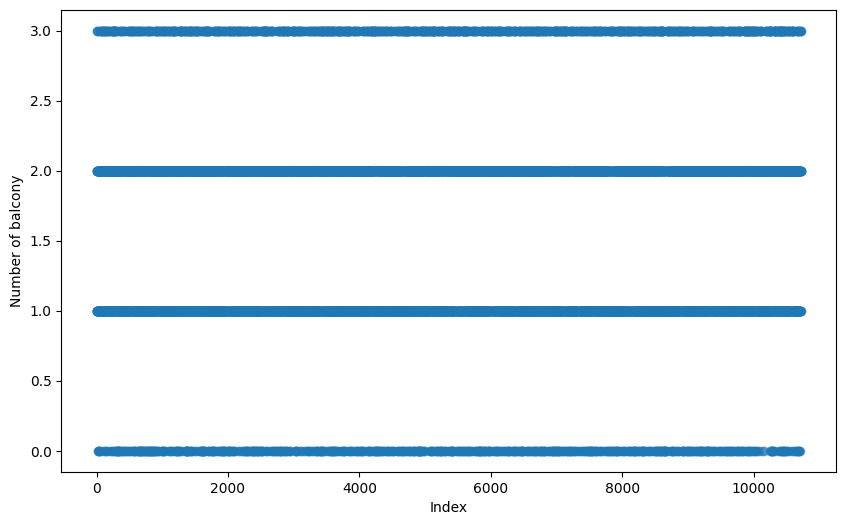

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data['bath'])), data['bath'], alpha=0.5)
plt.xlabel('Index')  # Ajout d'un libellé pour l'axe des abscisses (x-axis)
plt.ylabel('Number of Bathrooms')  # Ajout d'un libellé pour l'axe des ordonnées (y-axis)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(data['balcony'])), data['balcony'], alpha=0.5)
plt.xlabel('Index')  # Ajout d'un libellé pour l'axe des abscisses (x-axis)
plt.ylabel('Number of balcony')  # Ajout d'un libellé pour l'axe des ordonnées (y-axis)
plt.show()


# 5- Transform Data 


In [29]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
la = LabelEncoder()

# Select object and numeric columns separately
data_object = data.select_dtypes(include='object')
data_numeric = data.select_dtypes(exclude='object')

# Encode categorical columns
data_object_encoded = data_object.apply(lambda x: la.fit_transform(x))

# Concatenate encoded categorical columns and numeric columns
data_encoded = pd.concat([data_object_encoded, data_numeric], axis=1)

# Check the information of the transformed DataFrame
data_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10720 entries, 0 to 13317
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10720 non-null  int32  
 1   availability  10720 non-null  int32  
 2   location      10720 non-null  int32  
 3   size          10720 non-null  int32  
 4   total_sqft    10720 non-null  int32  
 5   bath          10720 non-null  float64
 6   balcony       10720 non-null  float64
 7   price         10720 non-null  float64
dtypes: float64(3), int32(5)
memory usage: 544.4 KB


In [30]:
data=data_encoded

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10720 entries, 0 to 13317
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10720 non-null  int32  
 1   availability  10720 non-null  int32  
 2   location      10720 non-null  int32  
 3   size          10720 non-null  int32  
 4   total_sqft    10720 non-null  int32  
 5   bath          10720 non-null  float64
 6   balcony       10720 non-null  float64
 7   price         10720 non-null  float64
dtypes: float64(3), int32(5)
memory usage: 544.4 KB


# 6- Models

### Mean Squared Error (MSE) :
Calcul de la moyenne des carrés des écarts entre les valeurs prédites et les valeurs réelles.

### Coefficient de détermination (R²) :
Mesure la proportion de la variance dans la variable dépendante qui est prévisible à partir de la variable indépendante.
Varie de 0 à 1, où 1 indique un ajustement parfait.



In [32]:
from sklearn.model_selection import train_test_split


## 6.1- Linear regression

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

X = data.drop('price', axis=1)  # Caractéristiques
y = data['price']  # Étiquettes
Algorithm=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','SVR']
R2=[]
MSE=[]
# Définissez votre modèle
model = LinearRegression()

# Définissez la métrique de performance à utiliser
scoring = {'MSE': make_scorer(mean_squared_error), 'r2': make_scorer(r2_score)}

# Définissez le nombre de plis pour la validation croisée
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Instanciez GridSearchCV
grid_search = GridSearchCV(model, {}, cv=kf, scoring=scoring, refit='MSE')

# Exécutez la recherche par grille sur l'ensemble d'entraînement
grid_search.fit(X, y)

# Obtenez les meilleurs paramètres
best_params = grid_search.best_params_
print("Meilleurs paramètres trouvés:", best_params)

# Obtenez les meilleurs résultats sur la validation croisée
cv_results = grid_search.cv_results_
avg_mse_LR = cv_results['mean_test_MSE'][grid_search.best_index_] 
print(f'Average MSE: {avg_mse_LR}')

# Obtenez les meilleurs résultats sur la validation croisée pour le R²
avg_r2_LR = cv_results['mean_test_r2'][grid_search.best_index_]
print(f'Average R-squared: {avg_r2_LR}')

MSE.append(avg_mse_LR)
R2.append(avg_r2_LR)

Meilleurs paramètres trouvés: {}
Average MSE: 825.1110264928982
Average R-squared: 0.3892101305461379


## 6.2- Arbre de decision

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

# Définissez le nombre de plis pour la validation croisée
k_folds = 5

# Divisez les données en k plis
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Listes pour stocker les résultats de chaque pli
mse_scores = []
r2_scores = []

# Boucle sur chaque pli de validation croisée
for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    # Instanciez et entraînez le modèle DecisionTreeRegressor sur le pli actuel
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train_kf, y_train_kf)
    
    # Effectuez des prédictions sur l'ensemble de test du pli actuel
    y_pred_kf = model.predict(X_test_kf)
    
    # Évaluez les performances du modèle sur le pli actuel
    mse_kf = mean_squared_error(y_test_kf, y_pred_kf)
    r2_kf = r2_score(y_test_kf, y_pred_kf)
    
    # Stockez les résultats du pli actuel
    mse_scores.append(mse_kf)
    r2_scores.append(r2_kf)

# Calculez la moyenne des scores sur tous les plis
avg_mse_DT = np.mean(mse_scores)
avg_r2_DT = np.mean(r2_scores)

print(f'Average MSE: {avg_mse_DT}')
print(f'Average R-squared: {avg_r2_DT}')

MSE.append(avg_mse_DT)
R2.append(avg_r2_DT)

Average MSE: 901.4626757381396
Average R-squared: 0.3316806988066583


## 6.3- Foret Aleatoire

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np

# Définissez le nombre de plis pour la validation croisée
k_folds = 5

# Divisez les données en k plis
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Listes pour stocker les résultats de chaque pli
mse_scores = []
r2_scores = []

# Boucle sur chaque pli de validation croisée
for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    # Instanciez et entraînez le modèle RandomForestRegressor sur le pli actuel
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_kf, y_train_kf)
    
    # Effectuez des prédictions sur l'ensemble de test du pli actuel
    y_pred_kf = model.predict(X_test_kf)
    
    # Évaluez les performances du modèle sur le pli actuel
    mse_kf = mean_squared_error(y_test_kf, y_pred_kf)
    r2_kf = r2_score(y_test_kf, y_pred_kf)
    
    # Stockez les résultats du pli actuel
    mse_scores.append(mse_kf)
    r2_scores.append(r2_kf)

# Calculez la moyenne des scores sur tous les plis
avg_mse_RF = np.mean(mse_scores)
avg_r2_RF = np.mean(r2_scores)

print(f'Average MSE: {avg_mse_RF}')
print(f'Average R-squared: {avg_r2_RF}')

MSE.append(avg_mse_RF)
R2.append(avg_r2_RF)

Average MSE: 510.47496724221037
Average R-squared: 0.621834015630631


## 6.4- Support vector regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import KFold
import numpy as np

# Définissez le nombre de plis pour la validation croisée
k_folds = 5

# Divisez les données en k plis
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Listes pour stocker les résultats de chaque pli
mse_scores = []
r2_scores = []

# Boucle sur chaque pli de validation croisée
for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]
    
    # Instanciez et entraînez le modèle SVR sur le pli actuel
    model = SVR(kernel='linear')
    model.fit(X_train_kf, y_train_kf)
    
    # Effectuez des prédictions sur l'ensemble de test du pli actuel
    y_pred_kf = model.predict(X_test_kf)
    
    # Évaluez les performances du modèle sur le pli actuel
    mse_kf = mean_squared_error(y_test_kf, y_pred_kf)
    r2_kf = r2_score(y_test_kf, y_pred_kf)
    
    # Stockez les résultats du pli actuel
    mse_scores.append(mse_kf)
    r2_scores.append(r2_kf)

# Calculez la moyenne des scores sur tous les plis
avg_mse = np.mean(mse_scores)
avg_r2 = np.mean(r2_scores)

print(f'Average MSE: {avg_mse_SVM}')
print(f'Average R-squared: {avg_r2_SVM}')

MSE.append(avg_mse_SVM)
R2.append(avg_r2_SVM)

In [42]:
df=pd.DataFrame({'Algorithm':Algorithm,'R2_Score':R2,'MSE':MSE})
df

,Algorithm,R2_Score,MSE
0,LinearRegression,0.389210,825.111026
1,DecisionTreeRegressor,0.331681,901.462676
2,RandomForestRegressor,0.621834,510.474967


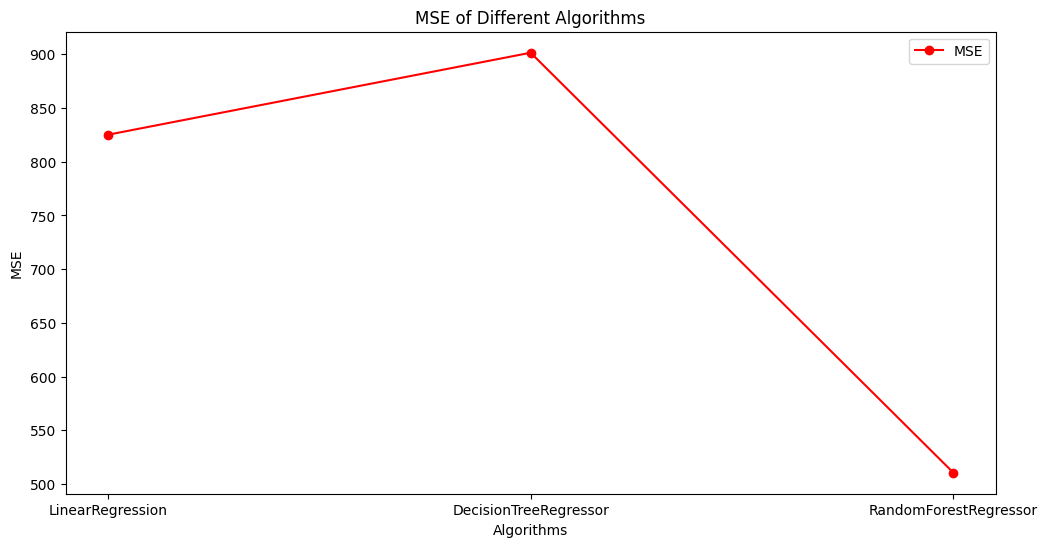

In [47]:

algorithms = df['Algorithm']
mse_values = df['MSE']
fig, ax = plt.subplots(figsize=(12, 6))  
ax.plot(algorithms, mse_values, label='MSE', color='red', marker='o') 
ax.set_title('MSE of Different Algorithms')
ax.set_xlabel('Algorithms')
ax.set_ylabel('MSE')

# Add a legend
ax.legend()

# Display the plot
plt.show()

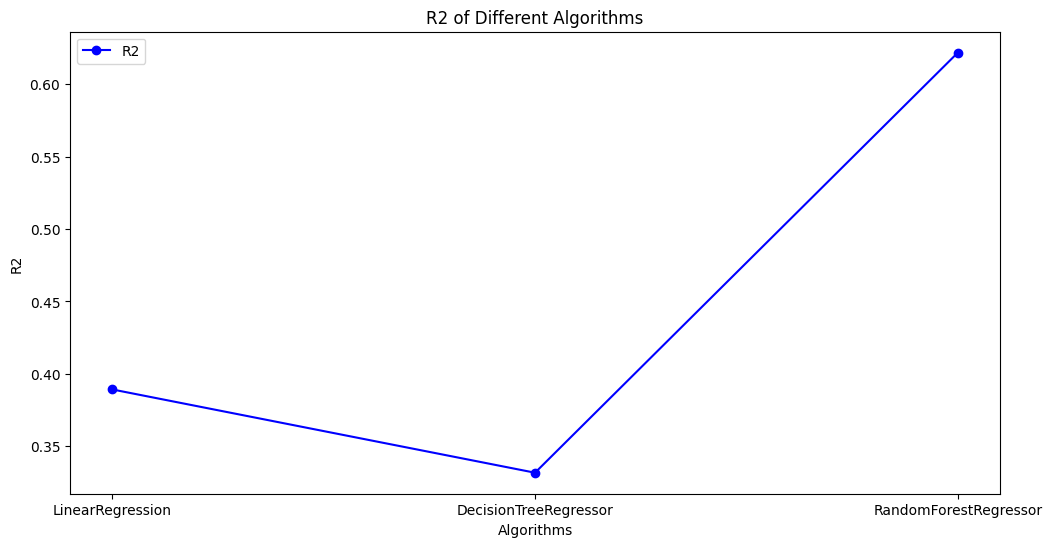

In [48]:
algorithms = df['Algorithm']
r2_values = df['R2_Score']
fig, ax = plt.subplots(figsize=(12, 6))  
ax.plot(algorithms, r2_values, label='R2', color='blue', marker='o') 
ax.set_title('R2 of Different Algorithms')
ax.set_xlabel('Algorithms')
ax.set_ylabel('R2')

# Add a legend
ax.legend()

# Display the plot
plt.show()